<a href="https://colab.research.google.com/github/AndreaDAlcantara/DS_Portfolio/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning - Customer Behaviour Prediction**

In [1]:
import pandas as pd

Reading public database available on Kaggle.

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Analysing data structure.

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Convert TotalCharges into numeric type in order to check what columns have null values.

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we could see, TotalCharges had 11 registers with null values so we decided to keep them with the mean value of TotalCharges column so we're still able to use the other columns of those registers during the modeling.

In [8]:
# Calculate the mean value of TotalCharges column
tc_mean = df['TotalCharges'].mean()
# Replace the np.nan values with its mean value
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, tc_mean)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Preparing the dataset to be used for modeling:  

*   removed customerID column because it's not a categorial variable
*   converted Churn column into binary to be used as the predictor variable
*   converted all the other columns into dummy variables to be used as the categorical variables

In [10]:
df_final = df.drop(['customerID'], axis=1)
df_final['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_final['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df_final)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Create a graph to show the correlation between the predictor variable Churn and the categorial variables.

In [11]:
from matplotlib import style

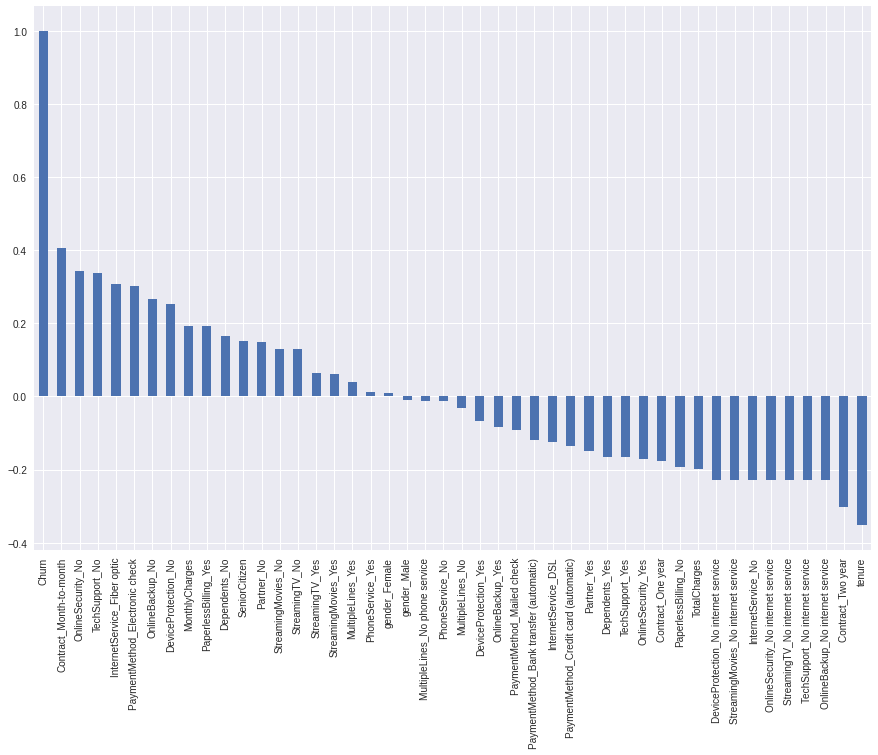

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**EDA for visualization**

According to the graph above, the variables that have a more negative relation (No Churn) to the predictor variable are tenure, 2-year contract; opposing to Monthly Contract and the lack of online security and tech support services. 
Let's investigate this!

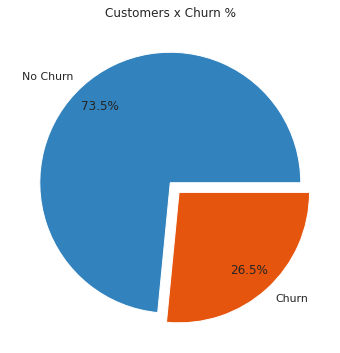

In [143]:
churn = df_final['Churn'].value_counts()
churn = [churn[0] / sum(churn) * 100,churn[1] / sum(churn) * 100] # No - Yes
fig2, ax = plt.subplots(figsize=(12, 6))

size = 1
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
explode = (0, 0.1) 

labels_p = ['No Churn','Churn']
ax.pie(churn, radius=1, colors=outer_colors, labels=labels_p, autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'), explode=explode, pctdistance=0.8)

ax.set(aspect="equal")
ax.set_title('Customers x Churn %', y=1, pad=-14)
plt.show()

Text(0, 0.5, '# Customers')

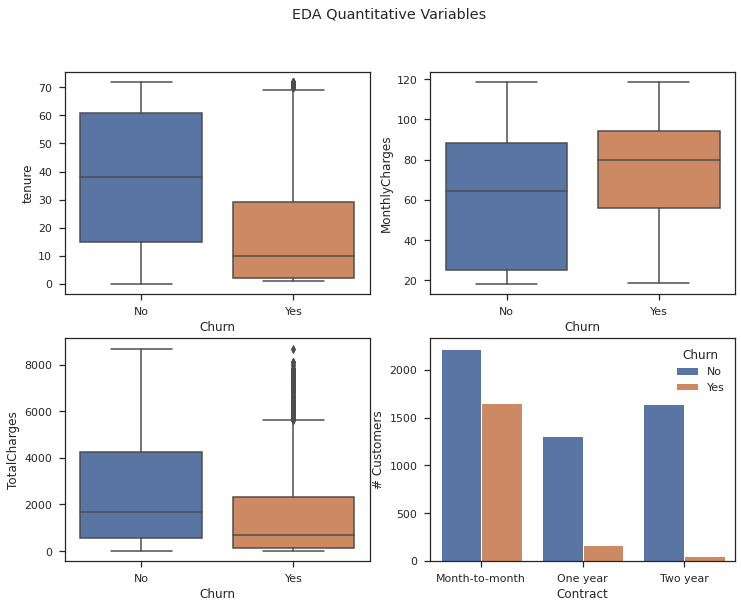

In [43]:
sns.set(style = 'ticks')
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
 
fig.suptitle('EDA Quantitative Variables')
 
sns.boxplot(ax=axes[0, 0], data=df, x='Churn', y='tenure')
sns.boxplot(ax=axes[0, 1], data=df, x='Churn', y='MonthlyCharges')
sns.boxplot(ax=axes[1, 0], data=df, x='Churn', y='TotalCharges')
df_contract = df.groupby(['Contract','Churn'], as_index=False)['customerID'].count()
contract = sns.barplot(ax=axes[1, 1], data=df_contract, x="Contract", y="customerID", hue="Churn")
contract.set_ylabel( "# Customers")

As showed above: 
 
 

1.   Churn rate lowers with the increase of tenure.
2.   Higher Monthly charges impacts more the Churn rate than Total Charges.
3.   Monthly contracts definitely contribute to increase the Churn rate compared to any other variable so far.

Let's look into the demographic variables!


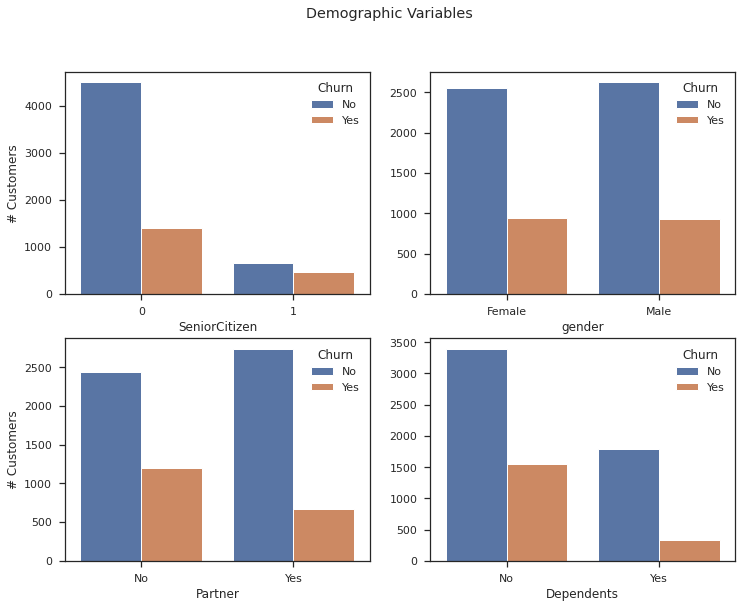

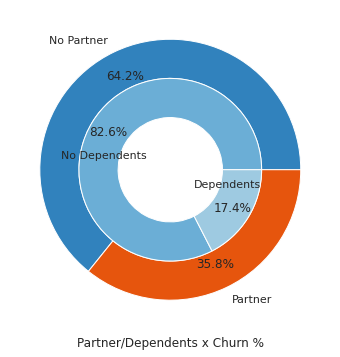

In [46]:
sns.set(style = 'ticks')
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
 
fig.suptitle('Demographic Variables')
 
df_senior = df.groupby(['SeniorCitizen','Churn'], as_index=False)['customerID'].count()
senior = sns.barplot(ax=axes[0, 0], data=df_senior, x='SeniorCitizen', y='customerID', hue="Churn")
senior.set_ylabel( "# Customers")
df_gender = df.groupby(['gender','Churn'], as_index=False)['customerID'].count()
gender = sns.barplot(ax=axes[0, 1], data=df_gender, x='gender', y='customerID', hue="Churn")
gender.set(ylabel=None)
df_partner = df.groupby(['Partner','Churn'], as_index=False)['customerID'].count()
partner = sns.barplot(ax=axes[1, 0], data=df_partner, x='Partner', y='customerID', hue="Churn")
partner.set_ylabel( "# Customers")
df_dep = df.groupby(['Dependents','Churn'], as_index=False)['customerID'].count()
dep = sns.barplot(ax=axes[1, 1], data=df_dep, x='Dependents', y='customerID', hue="Churn")
dep.set(ylabel=None)

partner = df_final[df_final['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes
dependents = df_final[df_final['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes
fig2, ax = plt.subplots(figsize=(12, 6))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

labels_p = ['No Partner','Partner']
ax.pie(partner, radius=1, colors=outer_colors, labels=labels_p, autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'),pctdistance=0.8)

labels_d = ['No Dependents','Dependents']
ax.pie(dependents, radius=1-size, colors=inner_colors, labels=labels_d, autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'),labeldistance=0.3, pctdistance=0.8)
ax.set(aspect="equal")
ax.set_title('Partner/Dependents x Churn %', y=0, pad=-14)
plt.show()

From demographic insights we see that Churn rate is higher in Senior Citizens and Single customers with no dependents. No significant difference with customers of different genders.




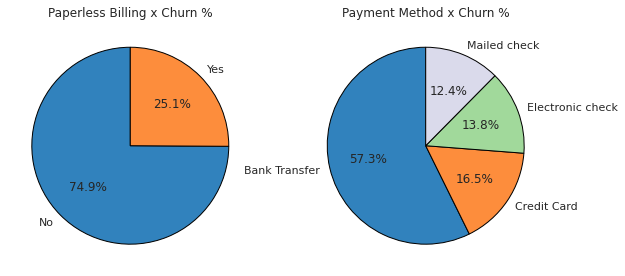

In [132]:
paperlessbilling = df_final[df_final['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df_final[df_final['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer - Credit Card - Electronic check - Mailed check

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4)*5)

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,12))
plt.subplot(1,3,1)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90, colors=colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless Billing x Churn %');

plt.subplot(1,3,2)
plt.pie(paymentmethod,labels = ['Bank Transfer','Credit Card','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90, colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment Method x Churn %');

Churn rate is significantly higher for customers that opted for paper billing and payment by bank transfer.

In [65]:
!pip install pandasql 
from pandasql import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=2f67334b78811f7933c76a103afbe186da8ca18a368ed9f57a502f2b7d13f064
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


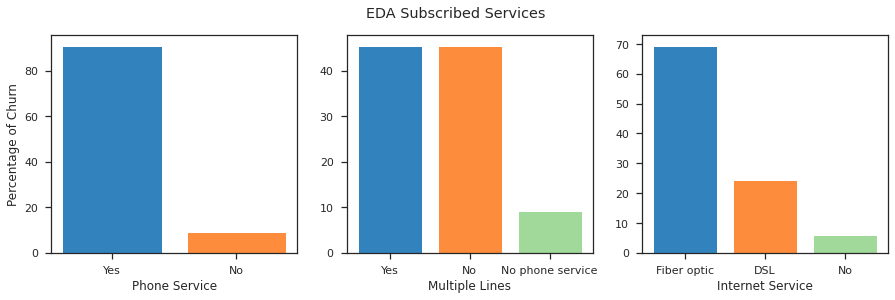

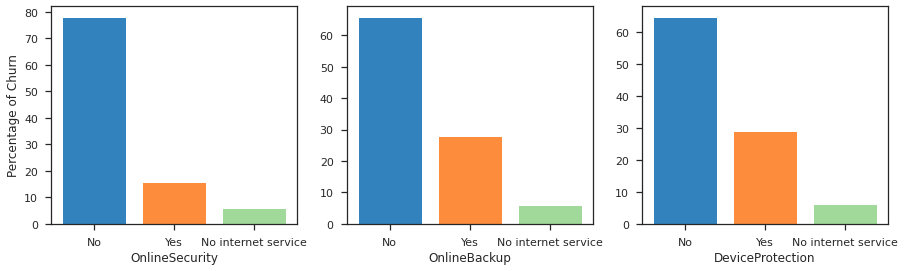

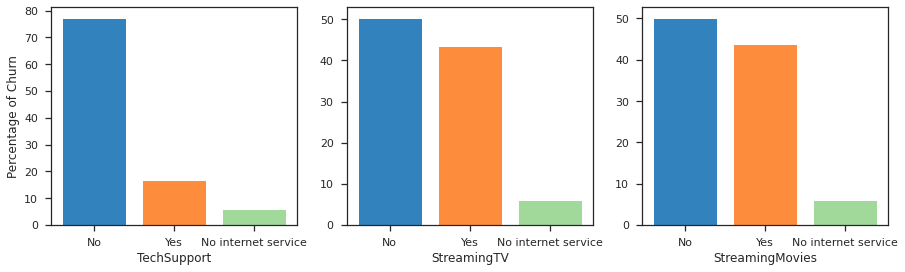

In [127]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4)*5)

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,4))
plt.suptitle('EDA Subscribed Services')

query = sqldf("SELECT PhoneService, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY PhoneService ORDER BY Percentual Desc")
plt.subplot(1,3,1)
plt.xlabel("Phone Service")
plt.ylabel("Percentage of Churn")
plt.bar(query['PhoneService'], query['Percentual'], color=colors)

query = sqldf("SELECT MultipleLines, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY MultipleLines ORDER BY Percentual Desc")
plt.subplot(1,3,2)
plt.xlabel("Multiple Lines")
plt.bar(query['MultipleLines'], query['Percentual'], color=colors)

query = sqldf("SELECT InternetService, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY InternetService ORDER BY Percentual Desc")
plt.subplot(1,3,3)
plt.xlabel("Internet Service")
plt.bar(query['InternetService'], query['Percentual'], color=colors)

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,4))

query = sqldf("SELECT OnlineSecurity, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY OnlineSecurity ORDER BY Percentual Desc")
plt.subplot(1,3,1)
plt.xlabel("OnlineSecurity")
plt.ylabel("Percentage of Churn")
plt.bar(query['OnlineSecurity'], query['Percentual'], color=colors)

query = sqldf("SELECT OnlineBackup, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY OnlineBackup ORDER BY Percentual Desc")
plt.subplot(1,3,2)
plt.xlabel("OnlineBackup")
plt.bar(query['OnlineBackup'], query['Percentual'], color=colors)

query = sqldf("SELECT DeviceProtection, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY DeviceProtection ORDER BY Percentual Desc")
plt.subplot(1,3,3)
plt.xlabel("DeviceProtection")
plt.bar(query['DeviceProtection'], query['Percentual'], color=colors)

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,4))

query = sqldf("SELECT TechSupport, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY TechSupport ORDER BY Percentual Desc")
plt.subplot(1,3,1)
plt.xlabel("TechSupport")
plt.ylabel("Percentage of Churn")
plt.bar(query['TechSupport'], query['Percentual'], color=colors)

query = sqldf("SELECT StreamingTV, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY StreamingTV ORDER BY Percentual Desc")
plt.subplot(1,3,2)
plt.xlabel("StreamingTV")
plt.bar(query['StreamingTV'], query['Percentual'], color=colors)

query = sqldf("SELECT StreamingMovies, count(*)*100.0/sum(count(*)) over() as Percentual FROM df WHERE Churn='Yes' GROUP BY StreamingMovies ORDER BY Percentual Desc")
plt.subplot(1,3,3)
plt.xlabel("StreamingMovies")
plt.bar(query['StreamingMovies'], query['Percentual'], color=colors)

plt.show()


Analysing the churn percentage of the services subscribed by the customers we can tell that the following contribute to higher churn:
*   Phone Service
*   Fiber Optic
*   No Online Security
*   No Online Backup
*   No Device Protection
*   No Tech Support




**Modeling**

Set the variables X and Y for modeling.

In [144]:
Y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Confusion Matrix function to evaluate the models.

In [145]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    names = ['True Neg','False Pos','False Neg','True Pos']
    ax= plt.subplot()
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    ax.xaxis.set_ticklabels(['Not Churn', 'Churn']); ax.yaxis.set_ticklabels(['Not Churn', 'Churn'])
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells    


Standardize the data in X then reassign it to the variable X using the transform provided below.

In [146]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

#transform = preprocessing.StandardScaler()
#X = transform.fit_transform(X)

Using the function train_test_split to split the data X and Y into training and test data.

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (5634, 45) (5634,)
Test set: (1409, 45) (1409,)


**Logistic Regression:**

LR: 0.8048261178140526


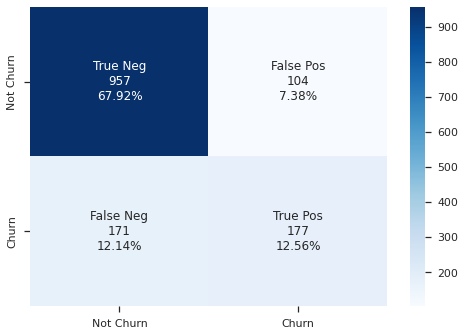

In [148]:
model = LogisticRegression()
result = model.fit(X_train, Y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
print ('LR:', model.score(X_test, Y_test))
plot_confusion_matrix(Y_test,prediction_test)

**Random Forest:**

Random Forest: 0.8097941802696949


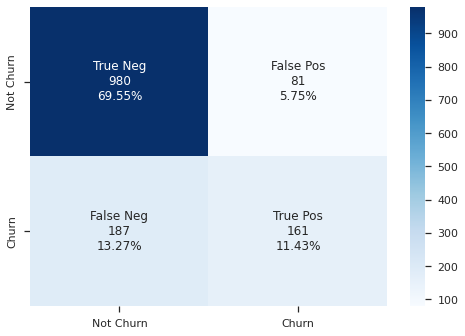

In [149]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Random Forest:', model_rf.score(X_test, Y_test))
plot_confusion_matrix(Y_test,prediction_test)

**Decision Tree:**

In [150]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [151]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

Decision Tree: 0.801277501774308


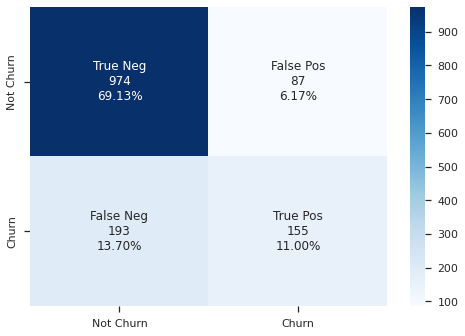

In [152]:
y_pred = tree_cv.predict(X_test)
print ('Decision Tree:', tree_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test,y_pred)

Compare results:

In [165]:
print('Accuracy for Logistics Regression method:', model.score(X_test, Y_test))
print( 'Accuracy for Random Forest method:', model_rf.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.8048261178140526
Accuracy for Random Forest method: 0.8097941802696949
Accuracy for Decision tree method: 0.801277501774308


**Weighting the variables**

Logistics Regression:

AxesSubplot(0.125,0.125;0.775x0.755)


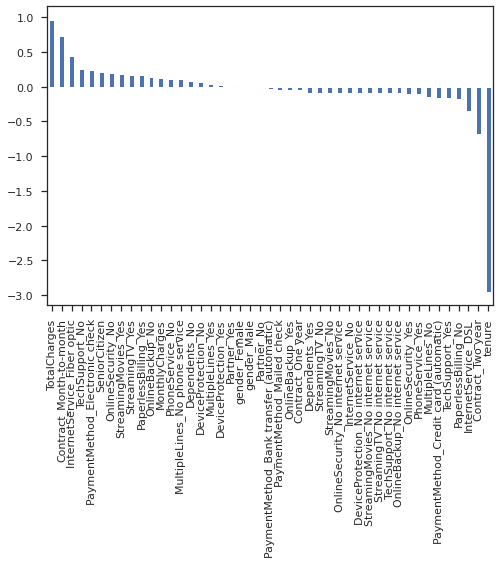

In [155]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

Random Forest:

AxesSubplot(0.125,0.125;0.775x0.755)


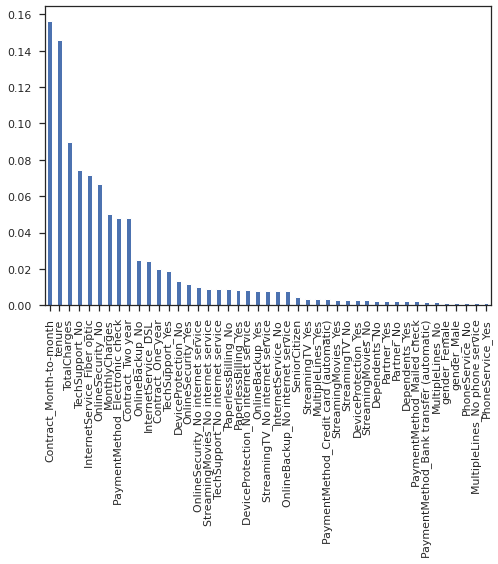

In [157]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

Decision Tree:

AxesSubplot(0.125,0.125;0.775x0.755)


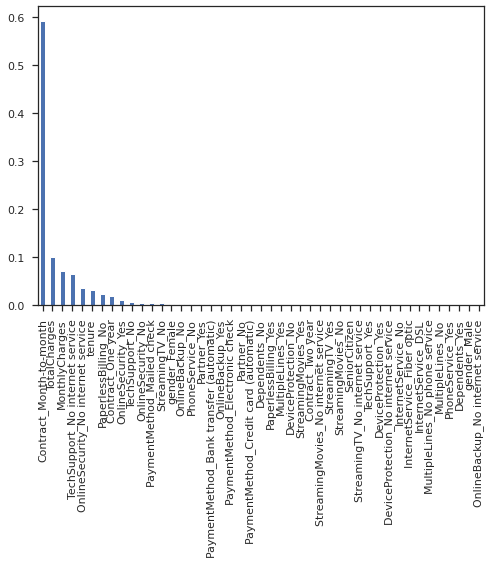

In [167]:
importances = tree_cv.best_estimator_.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

Analysing the weight of the variables after we applied Logistics Regression, Random Forest and Decision Tree, we can say that the following variables contributes to the increase of the churn rate: Monthly Contracts and Total Charges.

**Conclusion:**


Based on the EDA and modeling, customers that should be targeted first: 


> Senior Citizen 

> No Partner 

> No Dependents

> Monthly Contract

> Less than 10 months customer tenure


This is a first round of analysis considering the most important variables in relation with the predictor variable (Churn). 

Deeper analysis may generate more detailed data about the relation among the categorical variables that could bring up more aspects to be targeted.


